In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from LughaatNLP import LughaatNLP
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------------------
# 1. Load and prepare dataset
# ------------------------------
dataset = pd.read_csv(r'D:\Umer Notes\7th SEM\ML\PROJECT\combined_articles.csv')
dataset = dataset[['content', 'gold_label']]
dataset = dataset.dropna()
print("Raw data head:")
print(dataset.head(2))

# ------------------------------
# 2. Preprocessing
# ------------------------------
preprocessor = LughaatNLP()

def preprocess(text):
    text = preprocessor.normalize(text)
    text = preprocessor.remove_stopwords(text)
    text = preprocessor.lemmatize_sentence(text)
    tokens = preprocessor.urdu_tokenize(text)
    return tokens

dataset['content'] = dataset['content'].astype(str).apply(preprocess)

dataset = dataset[['content', 'gold_label']].dropna()

# ------------------------------
# 3. Label encoding
# ------------------------------
label_mapping = {
    "entertainment": 0,
    "business": 1,
    "sports": 2,
    "science-technology": 3,
    "world": 4
}

dataset['gold_label'] = dataset['gold_label'].map(label_mapping)
dataset = dataset.dropna(subset=['gold_label'])

print("\nAfter preprocessing and label mapping:")
print(dataset.head())
print(f"Unique labels: {dataset['gold_label'].unique()}")
print(f"Total samples: {len(dataset)}")

# ------------------------------
# 4. Train / test split
# ------------------------------
documents = dataset['content']
labels = dataset['gold_label']

X_train, X_test, y_train, y_test = train_test_split(
    documents,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print("\nTrain size:", len(X_train))
print("Test size:", len(X_test))

Raw data head:
                                             content     gold_label
0  بیجنگ : چینی ائیر شو میں سیکستھ جنیریش جدید طی...  entertainment
1  کراچی : وزیر اطلاعات سندھ شرجیل میمن کا کہنا ہ...  entertainment

After preprocessing and label mapping:
                                             content  gold_label
0  [بیجنگ, :, چینی, ائیر, شہ, سیکستھ, جنیریش, طیا...           0
1  [کراچی, :, وزیر, اطلاعات, سندھ, شرجیل, میمن, ک...           0
2  [سڈنی, :, تین, ٹی, ٹوئنٹی, میچ, سیریز, میچ, اس...           0
3  [اسلامی, نظریاتی, کونسل, دیئےگئے, فتوہ, سوال, ...           0
4  [اشتہار, گم, شدہ, بھائی, چنتا, مننا, متعلق, ۔,...           0
Unique labels: [0 1 2 3 4]
Total samples: 1074

Train size: 859
Test size: 215



X_train_pad shape: (859, 100)
X_test_pad shape: (215, 100)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
22/22 - 4s - 162ms/step - accuracy: 0.2722 - loss: 1.6052 - val_accuracy: 0.3547 - val_loss: 1.5978
Epoch 2/10
22/22 - 1s - 41ms/step - accuracy: 0.3959 - loss: 1.5530 - val_accuracy: 0.3837 - val_loss: 1.3766
Epoch 3/10
22/22 - 1s - 41ms/step - accuracy: 0.3843 - loss: 1.3617 - val_accuracy: 0.4360 - val_loss: 1.3263
Epoch 4/10
22/22 - 1s - 41ms/step - accuracy: 0.4702 - loss: 1.1994 - val_accuracy: 0.4942 - val_loss: 1.2820
Epoch 5/10
22/22 - 1s - 41ms/step - accuracy: 0.5779 - loss: 0.9872 - val_accuracy: 0.5814 - val_loss: 1.0401
Epoch 6/10
22/22 - 1s - 42ms/step - accuracy: 0.6507 - loss: 0.9348 - val_accuracy: 0.6453 - val_loss: 1.0920
Epoch 7/10
22/22 - 1s - 41ms/step - accuracy: 0.7249 - loss: 0.7922 - val_accuracy: 0.6744 - val_loss: 0.9675
Epoch 8/10
22/22 - 1s - 41ms/step - accuracy: 0.7424 - loss: 0.7441 - val_accuracy: 0.6570 - val_loss: 1.0214
Epoch 9/10
22/22 - 1s - 41ms/step - accuracy: 0.8544 - loss: 0.5162 - val_accuracy: 0.7558 - val_loss: 0.8910
Epoch 10/

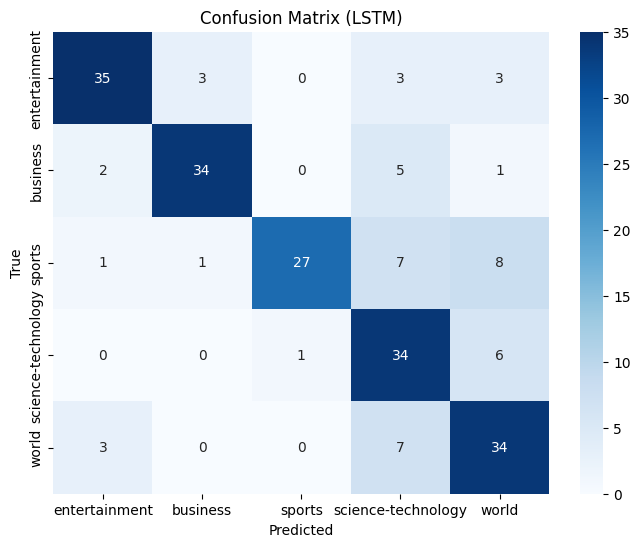


Overall accuracy: 0.7628

Accuracy per Class:
entertainment: 79.55%
business: 80.95%
sports: 61.36%
science-technology: 82.93%
world: 77.27%


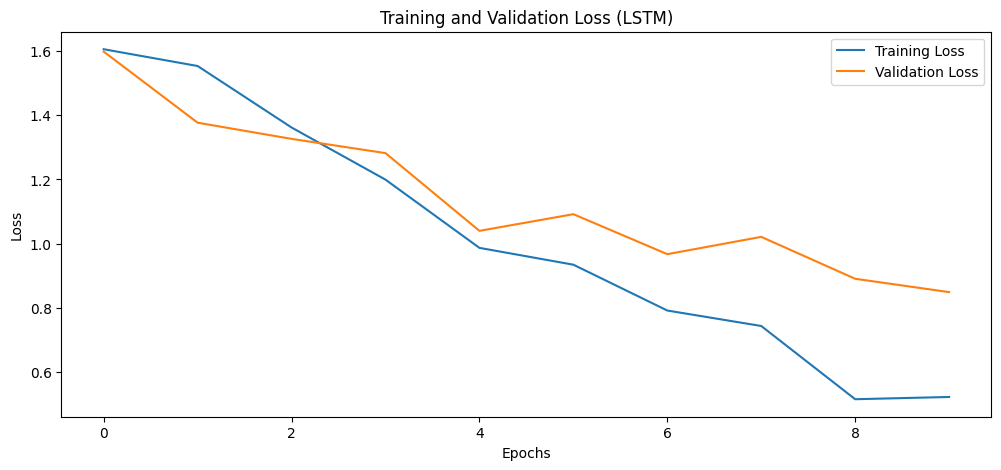

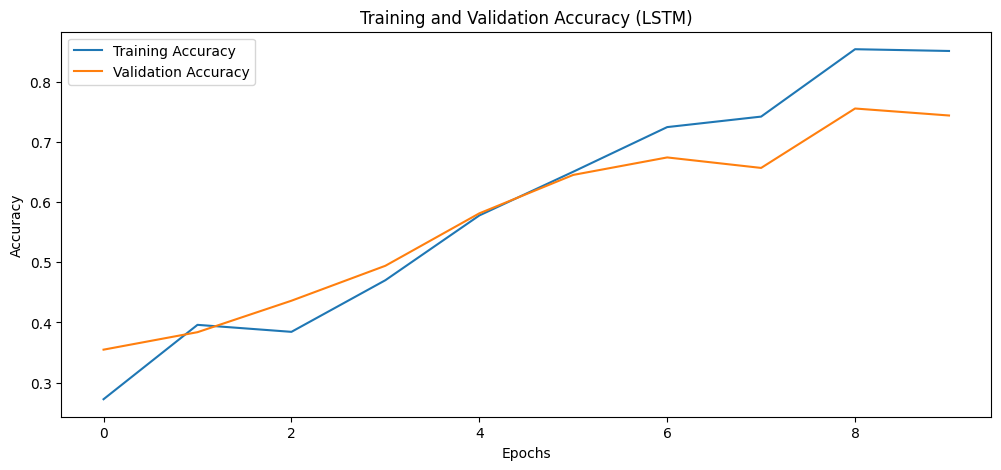

In [4]:
# ------------------------------
# 5. Tokenization & padding
# ------------------------------
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

y_train_categorical = to_categorical(y_train, num_classes=5)
y_test_categorical = to_categorical(y_test, num_classes=5)

print("\nX_train_pad shape:", X_train_pad.shape)
print("X_test_pad shape:", X_test_pad.shape)

# ------------------------------
# 6. Model definition
# ------------------------------
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ------------------------------
# 7. Training
# ------------------------------
history = model.fit(
    X_train_pad,
    y_train_categorical,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=2
)

# ------------------------------
# 8. Evaluation on test set
# ------------------------------
y_pred_proba = model.predict(X_test_pad)
y_pred = y_pred_proba.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=label_mapping.keys()
))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_mapping.keys(),
    yticklabels=label_mapping.keys()
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (LSTM)')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall accuracy: {accuracy:.4f}")

# ------------------------------
# 9. Accuracy per class
# ------------------------------
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

inv_label_mapping = {v: k for k, v in label_mapping.items()}

print("\nAccuracy per Class:")
for class_id in sorted(inv_label_mapping.keys()):
    class_name = inv_label_mapping[class_id]
    idx = np.where(y_test_arr == class_id)[0]
    if len(idx) == 0:
        print(f"{class_name}: no samples in test set")
        continue
    correct = np.sum(y_pred_arr[idx] == class_id)
    class_acc = correct / len(idx)
    print(f"{class_name}: {class_acc * 100:.2f}%")

# ------------------------------
# 10. Loss and accuracy curves
# ------------------------------
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# 1️⃣ Save the Keras LSTM model
model.save("nn_model.h5")
print("✔ Saved: nn_model.h5")

# 2️⃣ Save the Tokenizer
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import json

tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w", encoding="utf-8") as f:
    f.write(tokenizer_json)

print("✔ Saved: tokenizer.json")

# 3️⃣ Save the label mapping (optional but recommended)
import joblib
joblib.dump(label_mapping, "nn_label_mapping.pkl")
print("✔ Saved: nn_label_mapping.pkl")

print("\n🎉 Neural Network model + tokenizer saved successfully!")


✔ Saved: nn_model.h5
✔ Saved: tokenizer.json
✔ Saved: nn_label_mapping.pkl

🎉 Neural Network model + tokenizer saved successfully!
